In [5]:
#Using KNeighbors Regressor,Lasso Regression and SVM We are going to predict the Stock Proces of Tesla
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Tesla.csv', header=None)

In [7]:
df=df.iloc[1:]

df[0] = pd.to_datetime(df[0])
df[4] = pd.to_numeric(df[4])
df[3] = pd.to_numeric(df[3])
df[2] = pd.to_numeric(df[2])
df[1] = pd.to_numeric(df[1])
df.tail()

,0,1,2,3,4,5,6
1688,2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1689,2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258
1690,2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1691,2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1692,2017-03-17,264.000000,265.329987,261.200012,261.500000,6475900,261.5


In [8]:
train = df[0:1200]
valid = df[1200:]

x_train = train.iloc[:,[1,2]]
y_train = train.iloc[:,4]
date_train=train.iloc[:,0]
x_valid = valid.iloc[:,[1,2]]
y_valid = valid.iloc[:,4]
date_valid=valid.iloc[:,0]

In [9]:
date_train[1000]

Timestamp('2014-06-18 00:00:00')

C:\Users\ADMIN\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


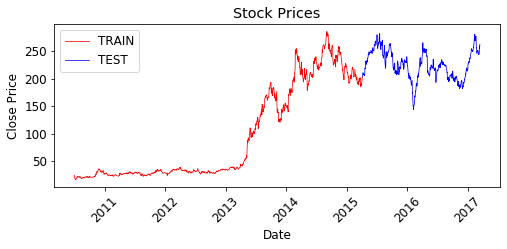

In [10]:
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize = (8,3))
ax.plot(date_train, y_train, color = 'red', marker='', linewidth='0.75')
ax.plot(date_valid, y_valid, color = 'blue', marker='', linewidth='0.75')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.legend(['TRAIN', 'TEST'], loc='upper left')
ax.set(xlabel="Date",
       ylabel="Close Price",
       title="Stock Prices");

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
pred = reg.predict(x_valid)

In [12]:
import math
err=[]
a=0
SUM=0
for i in range(1201,1693):
    a=y_valid[i]-pred[i-1201]
    err.append(a)
    SUM = SUM + pow(a,2)
(SUM/492)

9.331592198763595

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
s_train = scaler.fit_transform(x_train)
s_valid = scaler.transform(x_valid)

In [14]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(algorithm='auto', leaf_size=10)
knn.fit(s_train, y_train)
pred2 = knn.predict(s_valid)

In [15]:
import math
err2=[]
a=0
SUM=0
for i in range(1201,1693):
    a=y_valid[i]-pred2[i-1201]
    err2.append(a)
    SUM = SUM + pow(a,2)
(SUM/492)

11.896797544137163

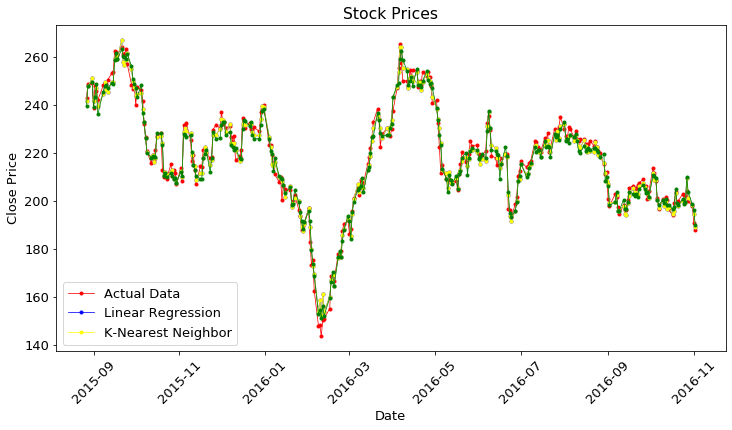

In [16]:
plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(date_valid[100:400], y_valid[100:400], color = 'red', marker='.', linewidth='0.75')
ax.plot(date_valid[100:400], pred[100:400], color = 'blue', marker='.', linewidth='0.75')
ax.plot(date_valid[100:400], pred[100:400], color = 'yellow', marker='.', linewidth='0.75')
ax.plot(date_valid[100:400], pred2[100:400], color = 'green', marker='.', linewidth='0.75')
plt.xticks(rotation='45')
plt.legend(['Actual Data', 'Linear Regression', 'K-Nearest Neighbor'], loc='lower left')
ax.set(xlabel="Date",
       ylabel="Close Price",
       title="Stock Prices");
plt.show()

In [17]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=10)
lasso.fit(x_train,y_train)
pred3 = lasso.predict(x_valid)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1456.2862381021205, tolerance: 869.7330685006539
  positive)


In [18]:
import math
err3=[]
a=0
SUM=0
for i in range(1201,1693):
    a=y_valid[i]-pred3[i-1201]
    err3.append(a)
    SUM = SUM + pow(a,2)
SUM/492

11.610674405983753

In [21]:
from sklearn import svm
svmm = svm.SVR(gamma='auto_deprecated', kernel='linear', max_iter=-1).fit(s_train,y_train)
pred1 = svmm.predict(s_valid)

In [22]:
import math
err1=[]
a=0
SUM=0
for i in range(1201,1693):
    a=y_valid[i]-pred1[i-1201]
    err1.append(a)
    SUM = SUM + pow(a,2)
SUM/492

11.51061128188675

In [23]:
import math
mape=[]
a=0
SUM=0
for i in range(1201,1693):
    a=(abs((y_valid[i]-pred1[i-1201])/y_valid[i]))
    mape.append(a)
    SUM = SUM + a
(SUM/492)*100

1.1820426854670727

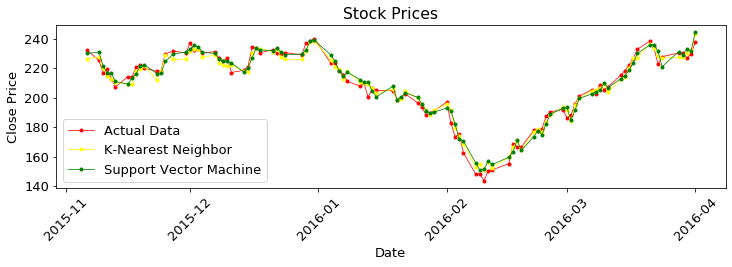

In [24]:
fig, ax = plt.subplots(figsize = (12,3))
ax.plot(date_valid[150:250], y_valid[150:250], color = 'red', marker='.', linewidth='0.75')
ax.plot(date_valid[150:250], pred2[150:250], color = 'yellow', marker='.', linewidth='0.75')
ax.plot(date_valid[150:250], pred1[150:250], color = 'green', marker='.', linewidth='0.75')
plt.xticks(rotation='45')
plt.legend(['Actual Data', 'K-Nearest Neighbor', 'Support Vector Machine'], loc='lower left')
ax.set(xlabel="Date",
       ylabel="Close Price",
       title="Stock Prices");
plt.show()

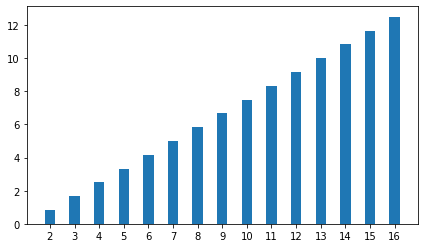

In [26]:
a=0
w=[]
d=[]
for i in range(0,15):
        a=(100/120)*(15-i)
        d.append(14-i+1)
        w.append(a)
    
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(figsize = (7,4))

plt.bar(w, w, width=0.35)
plt.xticks(w, [16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1])
plt.show()

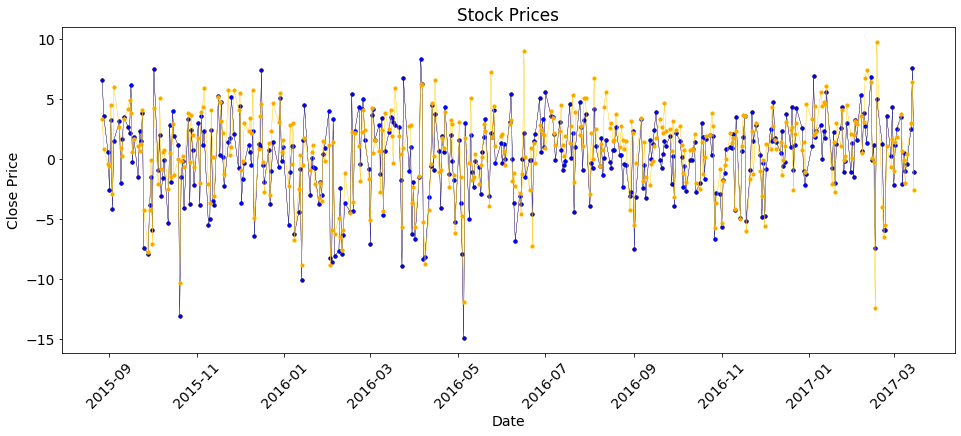

In [29]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize = (16,6))
ax.plot(date_valid[100:490], err1[100:490], color = 'red', marker='.', linewidth='0.25')
ax.plot(date_valid[100:490], err1[100:490], color = 'green', marker='.', linewidth='0.25')
ax.plot(date_valid[100:490], err1[100:490], color = 'blue', marker='.', linewidth='0.25')
ax.plot(date_valid[100:490], err2[100:490], color = 'yellow', marker='.', linewidth='0.25')
ax.plot(date_valid[100:490], err2[100:490], color = 'orange', marker='.', linewidth='0.25')
plt.xticks(rotation='45')
ax.set(xlabel="Date",
       ylabel="Close Price",
       title="Stock Prices");
plt.show()

In [ ]:
#SVM stands Slightly Better